# Module 11 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [36]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

#for plotting axis 
import numpy as np

In [37]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [38]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html

#set the URL as a variable 
url ='https://static.bc-edx.com/data/web/mars_facts/temperature.html'

#send the browser to the URL
browser.visit(url)

#save the HTML from browser
html = browser.html


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [39]:
# Create a Beautiful Soup Object
mars_temp = BeautifulSoup(html, 'html.parser')

In [40]:
# Extract all rows of data
table = mars_temp.find('table', class_ = 'table')
rows = table.find_all('tr', class_ = 'data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [41]:
# Create an empty list
table_list = []

#add header row to list
first_row = table.find_all('th')
headers = [first.text for first in first_row]
table_list.append(headers)

# Loop through the scraped data to create a list of rows
for row in rows:
    row_data = row.find_all('td')
    values = [column.text for column in row_data]
    table_list.append(values)

#view list
table_list

[['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'],
 ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165'

In [42]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
table_df = pd.DataFrame(table_list)

#set table headers as df headers
header_row = table_df.iloc[0]
weather_df = pd.DataFrame(table_df.values[1:], columns=header_row)

In [43]:
# Confirm DataFrame was created successfully
weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [44]:
# Examine data type of each column
weather_df.dtypes

0
id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [45]:
# Change data types for data analysis
weather_df['terrestrial_date'] = pd.to_datetime(weather_df['terrestrial_date'])
weather_df['sol'] = weather_df['sol'].astype(int)
weather_df['ls'] = weather_df['ls'].astype(int)
weather_df['month'] = weather_df['month'].astype(int)
weather_df['min_temp'] = weather_df['min_temp'].astype(float)
weather_df['pressure'] = weather_df['pressure'].astype(float)

weather_df.head()


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [46]:
# Confirm type changes were successful by examining data types again
weather_df.dtypes

0
id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [47]:
# 1. How many months are there on Mars?
number_of_months = weather_df['month'].max()
print(f'There are {number_of_months} Martian months')

There are 12 Martian months


In [48]:
#alternative method for finding answer to question1 (to give in same format as sample)
months_grouped = weather_df.groupby('month')
number_of_months_alt = months_grouped['month'].count()
number_of_months_alt

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [49]:
# 2. How many Martian days' worth of data are there?
number_of_days = weather_df['sol'].count()
print(f'There are {number_of_days} Martian days worth of data in the table')

There are 1867 Martian days worth of data in the table


In [50]:
# 3. What is the average low temperature by month?
av_low_temp = months_grouped['min_temp'].mean()
av_low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

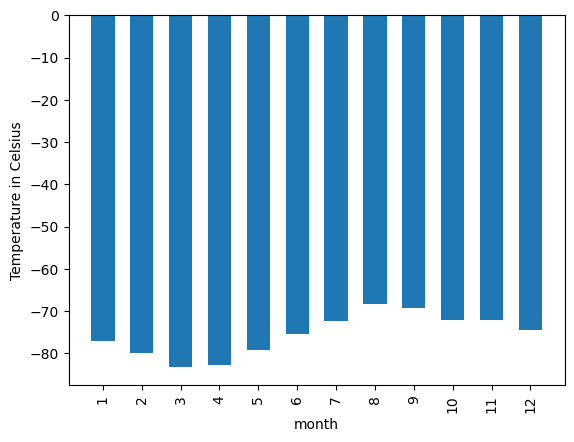

In [51]:
# Plot the average temperature by month

#define axis
temp_xaxis = np.arange(len(months_grouped['month']))
temp_yaxis = av_low_temp

#plot chart
av_temp = plt.bar(temp_xaxis, temp_yaxis, width=0.6)

#define tick locations and labels
tick_locations = [value for value in temp_xaxis]

tick_labels = weather_df['month'].unique()
tick_labels.sort()

#plot xticks
plt.xticks(tick_locations, tick_labels, rotation=90)

#label axis
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')

plt.show()

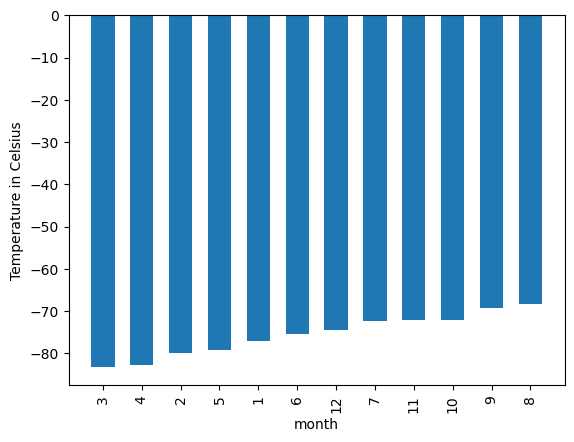

On average the coldest minimum temperatures are in the third month
month
3   -83.307292
Name: min_temp, dtype: float64
----------------------------------------------------
On average the hottest minimum temperatures are in the eigth month
month
8   -68.382979
Name: min_temp, dtype: float64


In [52]:
# Identify the coldest and hottest months in Curiosity's location

#use same x & y axis values from above, sort when plotting
plt.bar(temp_xaxis, sorted(temp_yaxis), width=0.6)

#plot xticks, same tick locations as used in above plot
#tick labels from sorted series
pressure_sorted = av_low_temp.sort_values()
#print(pressure_sorted)

tick_labels_sorted = pressure_sorted.index

plt.xticks(tick_locations, tick_labels_sorted, rotation=90)

#label axis
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')

plt.show()

#---------------------------------------------------------------------------------------------
#alternative identification of hottest and coldest months
coldest = av_low_temp.min()
coldest_month = av_low_temp.loc[av_low_temp == coldest]

hottest = av_low_temp.max()
hottest_month = av_low_temp.loc[av_low_temp == hottest]

print(f'On average the coldest minimum temperatures are in the third month')
print(coldest_month)
print(f'----------------------------------------------------')
print(f'On average the hottest minimum temperatures are in the eigth month')
print(hottest_month)

In [53]:
# 4. Average pressure by Martian month
av_pressure = months_grouped['pressure'].mean()
av_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

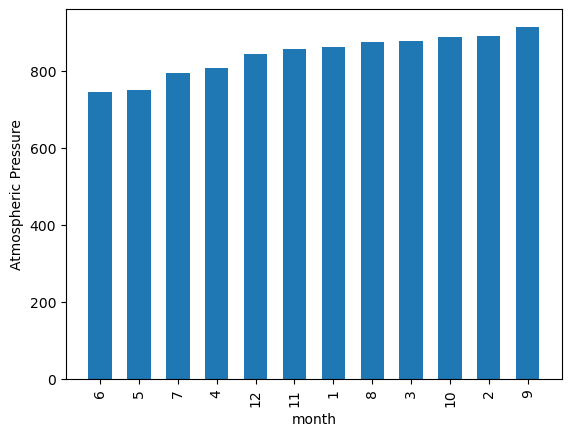

On average the lowest atmospheric pressure is in the sixth month
month
6    745.054422
Name: pressure, dtype: float64
----------------------------------------------------
On average the highest atmospheric pressure is in the ninth month
month
9    913.30597
Name: pressure, dtype: float64


In [58]:
# Plot the average pressure by month
pres_xaxis = np.arange(len(months_grouped['month']))
pres_yaxis = av_pressure

#sort when plotting
plt.bar(pres_xaxis, sorted(pres_yaxis), width=0.6)

#plot xticks, same tick locations as used in above plots
#tick labels from sorted series
sorted_pressure = av_pressure.sort_values()

tick_labels_sorted = sorted_pressure.index

plt.xticks(tick_locations, tick_labels_sorted, rotation=90)

#label axis
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')

plt.show()

#alternative identification of hottest and coldest months
lowest = av_pressure.min()
lowest_month = av_pressure.loc[av_pressure == lowest]

highest = av_pressure.max()
highest_month = av_pressure.loc[av_pressure == highest]

print(f'On average the lowest atmospheric pressure is in the sixth month')
print(lowest_month)
print(f'----------------------------------------------------')
print(f'On average the highest atmospheric pressure is in the ninth month')
print(highest_month)

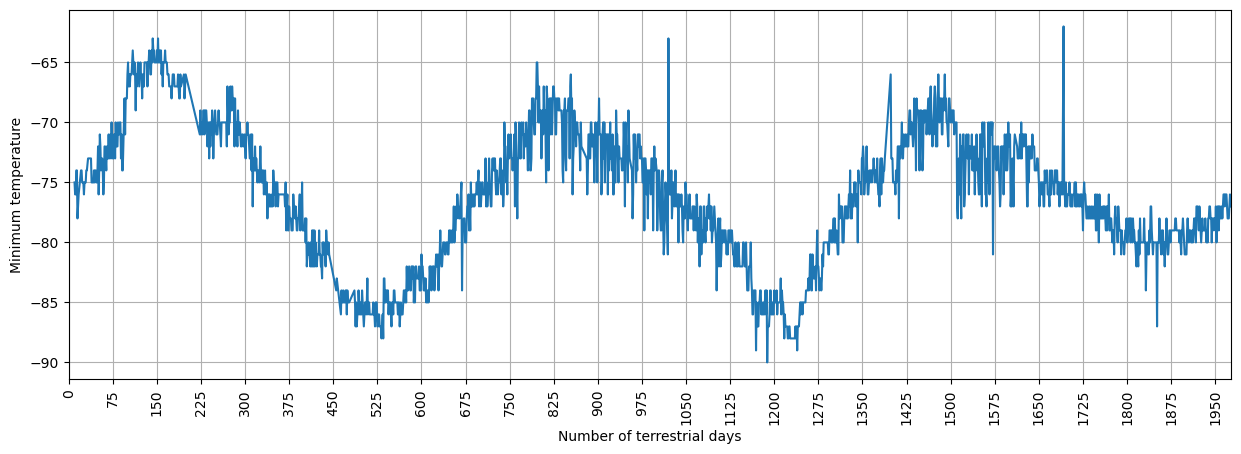

In [55]:
# 5. How many terrestrial (earth) days are there in a Martian year?

#define axis
days_xaxis = weather_df['sol']
days_yaxis = weather_df['min_temp']

#increase width of plot to view peaks more easily
plt.figure().set_figwidth(15)

plt.plot(days_xaxis, days_yaxis)

#plot xticks
max_x = days_xaxis.max()
plt.xticks(np.arange(0, max_x, 75), rotation=90)

#label axis
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')

#set xlimits
plt.xlim(0, max_x)

#plot grid to ease visual interpretation
plt.grid()

plt.show()

#### Peaks appear to be 150 - 825, and 825 - 1500, both around 675 days. As stated in the sample below, the estimate of 675 days is close to the 687 equivalent earth days found when searching the internet.

***


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

***


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [56]:
# Write the data to a CSV
weather_df.to_csv('mars_weather.csv')

In [57]:
browser.quit()